# ***Data Augmentation***

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image_dataset_from_directory

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

 # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/1017.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/4803.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/5106.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/3765.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/780.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/3952.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/227.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/2731.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/579.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/353.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/Wi

In [3]:
# Assigning the training and validation directories

base_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/'

train_dir = os.path.join(base_dir, "Train")
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, "Test")

## ***Image Augmentation: Using ImageDataGenerator***

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   brightness_range = (0.5, 0.9),
                                   zoom_range=0.3,
                                   fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Creating the dataset of augmented images: Images get augmented only during training
# This will be passed to the model.fit() during training for using the augmented images

train_dataset = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(160,160),
                                                  batch_size=64,
                                                  class_mode="binary")

validation_dataset = test_datagen.flow_from_directory(validation_dir,
                                                      target_size=(160, 160),
                                                      batch_size=64,
                                                      class_mode="binary")

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


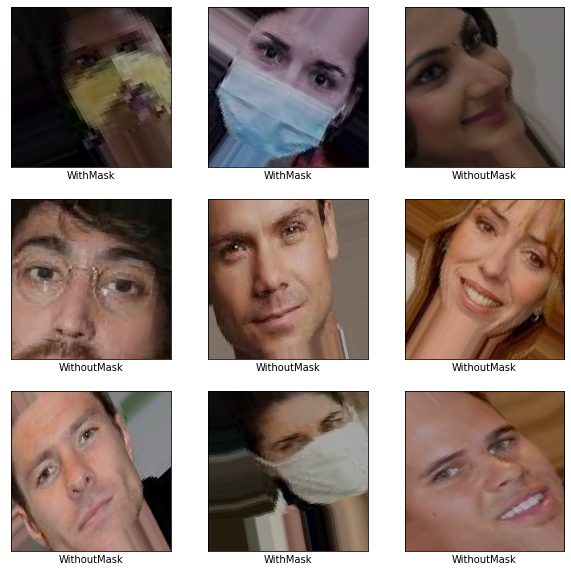

In [6]:
# 0 -- With Mask //// 1 -- Without Mask
class_names = ['WithMask', 'WithoutMask']

# Selects some images from the train_dataset (Iterator object)
images,labels = next(iter(train_dataset))

# Plots the images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    if (labels[i]==1.0):plt.xlabel(class_names[1])
    elif (labels[i]==0.0): plt.xlabel(class_names[0])
    

plt.show()